Import Libraries
----------------

In [1]:
import keras.models as models
import keras.layers as layers
import numpy
import pandas
import random

Using Theano backend.


Setup Paramters
---------------

In [2]:
%matplotlib inline
input_neurons = 2
hidden_neurons = 300
output_neurons = 2

Define Network
--------------

In [3]:
model = models.Sequential([
        layers.recurrent.LSTM(hidden_neurons, 
                              input_shape=[None, input_neurons],
                              return_sequences=False),
        layers.core.Dense(output_neurons),
        layers.core.Activation("linear")
    ])
model.compile(loss="mean_squared_error", optimizer="rmsprop")

Prepare Data
------------

In [4]:
flow = (list(range(1, 10, 1)) + list(range(10, 1, -1))) * 1000
data = pandas.DataFrame({'a': flow, 'b': flow})
data.b = data.b.shift(9)
data = data.iloc[10:] * random.random()
data = data.reset_index(drop=True)
data.head()

a         b
0  8.187435  1.819430
1  7.277720  2.729145
2  6.368005  3.638860
3  5.458290  4.548575
4  4.548575  5.458290

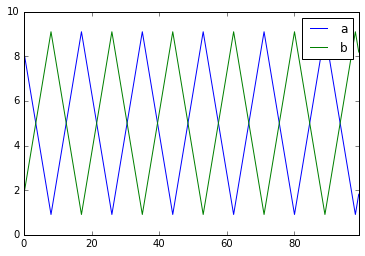

In [5]:
data[:100].plot()

Format Data
-----------

In [6]:
def _load_data(data, previous_count=100):
    X, Y = [], []
    for i in range(len(data) - previous_count):
        X.append(data.iloc[i:i + previous_count].as_matrix())
        Y.append(data.iloc[i + previous_count].as_matrix())
    return numpy.array(X), numpy.array(Y)

def train_test_split(data_frame, test_size=0.1):
    split_index = round(len(data_frame) * (1 - test_size))
    X_train, y_train = _load_data(data_frame.iloc[0:split_index])
    X_test, y_test = _load_data(data_frame.iloc[split_index:])
    return (X_train, y_train), (X_test, y_test)

(X_train, y_train), (X_test, y_test) = train_test_split(data)

Train Model
-----------

In [7]:
model.fit(X_train, y_train, batch_size=450, epochs=3, validation_split=0.05)

Train on 15286 samples, validate on 805 samples
Epoch 1/3
15286/15286 [==============================] - 126s - loss: 2.6300 - val_loss: 0.6369
Epoch 2/3
15286/15286 [==============================] - 127s - loss: 0.2916 - val_loss: 0.1405
Epoch 3/3
15286/15286 [==============================] - 125s - loss: 0.2451 - val_loss: 0.4723


Evaluate Model
--------------

In [8]:
predicted = model.predict(X_test)
error = numpy.sqrt(((predicted - y_test) ** 2).mean(axis=0))

In [9]:
error

array([ 0.74146318,  0.62849466])

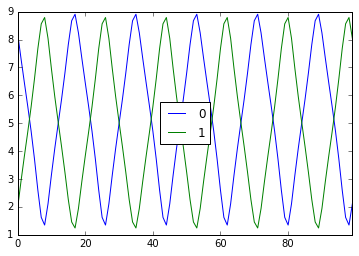

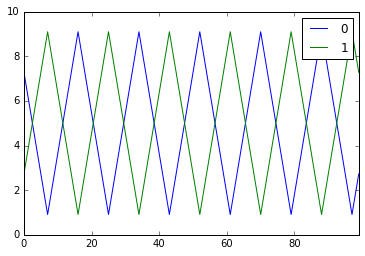

In [10]:
pandas.DataFrame(predicted[:100]).plot()  
pandas.DataFrame(y_test[:100]).plot()  